# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and process the data

In [30]:
data_path_1 = "data/prices_round_2_day_-1.csv"
data_path_2 = "data/prices_round_2_day_0.csv"
data_path_3 = "data/prices_round_2_day_1.csv"

data_paths = [data_path_1, data_path_2, data_path_3]

# read the data and concatenate them
all_data = pd.concat([pd.read_csv(data_path, sep=";") for data_path in data_paths])
all_data["timestamp"] = all_data["timestamp"]//100
all_data["timestamp"] = all_data["timestamp"] + (all_data["DAY"]+1)*10000
all_data.drop(columns=["DAY"], inplace=True)
all_data.set_index("timestamp", inplace=True)

# Helper functions

# Orchids research

In [31]:
all_data

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
timestamp,,,,,,
0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000
1,1201.75,1.5,9.5,-2.0,2499.4197,79.00410
2,1201.75,1.5,9.5,-2.0,2498.8457,79.00821
3,1201.75,1.5,9.5,-2.0,2498.2780,79.01234
4,1201.75,1.5,9.5,-2.0,2497.7166,79.01649
...,...,...,...,...,...,...
29996,1036.25,0.9,9.5,-5.0,2299.9436,69.93549
29997,1036.25,0.9,9.5,-5.0,2299.9556,69.95153
29998,1036.25,0.9,9.5,-5.0,2299.9690,69.96762


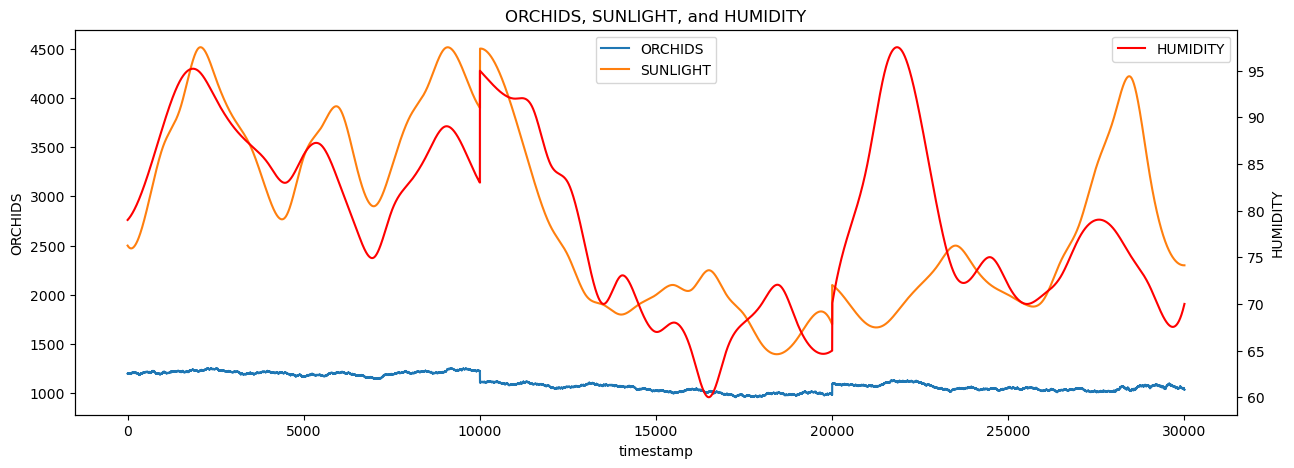

In [34]:
# plot ORCHIDS, SUNLIGHT, and HUMIDITY on the same plot with different axes
plt.figure(figsize=(15, 5))
sns.lineplot(data=all_data["ORCHIDS"], label="ORCHIDS")
sns.lineplot(data=all_data["SUNLIGHT"], label="SUNLIGHT")
plt.ylabel("ORCHIDS")
plt.twinx()
sns.lineplot(data=all_data["HUMIDITY"], color="red", label="HUMIDITY")
plt.ylabel("HUMIDITY")
plt.title("ORCHIDS, SUNLIGHT, and HUMIDITY")
plt.show()
